# Simulating random galaxies

In this notebook, I will use galsim to simulate random galaxies.

## Downloading libraries

In [1]:
# Load modules/libraries
import copy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
import galsim

We will create elliptical galaxies, spiral galaxies, ring galaxies and mergers of two galaxies. We will do 75:100:100:125.

## Creating one elliptical galaxy


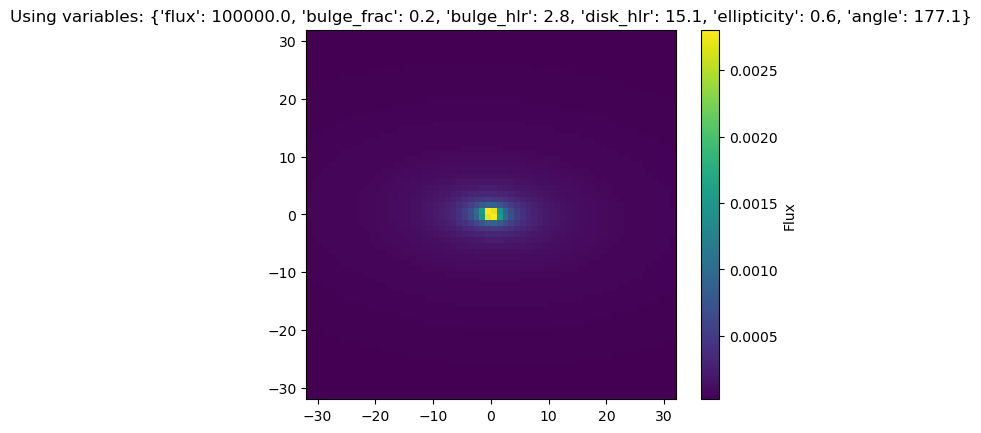

In [2]:
##### parameter values
#we keep the flux the same for now
bulge_frac = round(np.random.uniform(0.1,0.9),1) #0.5
bulge_hlr = round(np.random.uniform(1,20),1) #10
angle = round(np.random.uniform(0,180),1) #30
disk_hlr = round(np.random.uniform(1,20),1) #2.5
if (disk_hlr+bulge_hlr)>20:
    disk_hlr =round(np.random.uniform(1,10),1)
    bulge_hlr=round(np.random.uniform(1,10),1)
ellipticity = round(np.random.uniform(0.1,0.9),1)#0.5

# Increase the maximum FFT size allowed by GalSim
galsim.GSParams.maximum_fft_size = 18000

# Set up the parameters for the galaxy
galaxy_params = {
    'flux': 1e5,                # Total flux of the galaxy
    'bulge_frac': bulge_frac,          # Fraction of light in the bulge component
    'bulge_hlr': bulge_hlr,           # Half-light radius of the bulge component (in arcseconds)
    'disk_hlr': disk_hlr,            # Half-light radius of the disk component (in arcseconds)
    'ellipticity': ellipticity,         # Ellipticity of the galaxy
    'angle': angle               # Rotation angle of the galaxy (in degrees)
}

# Create a galaxy using a bulge-disk model
bulge = galsim.DeVaucouleurs(half_light_radius=galaxy_params['bulge_hlr'])
disk = galsim.Exponential(half_light_radius=galaxy_params['disk_hlr'])
galaxy = galaxy_params['bulge_frac'] * bulge + (1 - galaxy_params['bulge_frac']) * disk

# Apply additional transformations
galaxy = galaxy.shear(e=galaxy_params['ellipticity'], beta=galaxy_params['angle']*galsim.degrees)

# Create an image of the galaxy
image_size = 64  # Size of the square image in pixels
pixel_scale = 0.2  # Size of each pixel in arcseconds
image = galsim.ImageF(image_size, image_size, scale=pixel_scale)
galaxy.drawImage(image)

# Display the generated galaxy image
plt.imshow(image.array,  origin='lower', extent=[-image_size/2, image_size/2, -image_size/2, image_size/2])
plt.colorbar(label='Flux')
plt.title('Using variables: {}'.format(galaxy_params) )
plt.show()

## Creating a spiral galaxy 

## Simulate ring galaxies 

## Merger galaxies

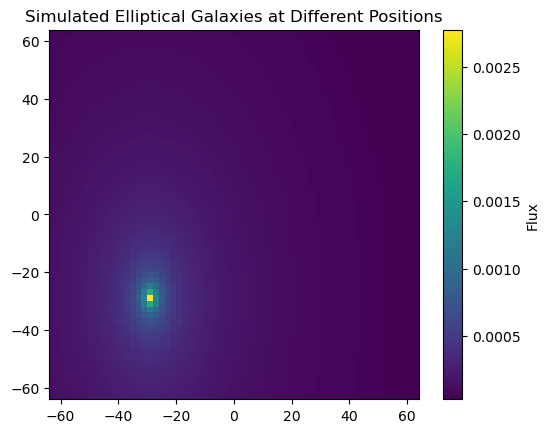

In [27]:
# Create an empty image
image = galsim.ImageF(bounds=galsim.BoundsI(1, 64, 1, 64), scale=0.2)

# Set up parameters for the elliptical galaxies
galaxy_params_1 = {
    'flux': 1e5,                # Total flux of the galaxy
    'bulge_frac': 0.3,          # Fraction of light in the bulge component
    'bulge_hlr': 10,           # Half-light radius of the bulge component (in arcseconds)
    'disk_hlr': 10,            # Half-light radius of the disk component (in arcseconds)
    'ellipticity': 0.5,         # Ellipticity of the galaxy
    'angle': 90          
}

# Create a galaxy using a bulge-disk model
bulge = galsim.DeVaucouleurs(half_light_radius=galaxy_params_1['bulge_hlr'])
disk = galsim.Exponential(half_light_radius=galaxy_params_1['disk_hlr'])
galaxy_1 = galaxy_params_1['bulge_frac'] * bulge + (1 - galaxy_params_1['bulge_frac']) * disk

# Apply additional transformations
galaxy_1 = galaxy_1.shear(e=galaxy_params_1['ellipticity'], beta=galaxy_params_1['angle']*galsim.degrees)
im1=galaxy_1.drawImage(image, method='fft', use_true_center=False, offset=(10, 10))

# Set up parameters for the elliptical galaxies
galaxy_params_2 = {
    'flux': 1e5,                # Total flux of the galaxy
    'bulge_frac': 0.3,          # Fraction of light in the bulge component
    'bulge_hlr': 10,           # Half-light radius of the bulge component (in arcseconds)
    'disk_hlr': 10,            # Half-light radius of the disk component (in arcseconds)
    'ellipticity': 0.5,         # Ellipticity of the galaxy
    'angle': 90          
}

# Create a galaxy using a bulge-disk model
bulge = galsim.DeVaucouleurs(half_light_radius=galaxy_params_2['bulge_hlr'])
disk = galsim.Exponential(half_light_radius=galaxy_params_2['disk_hlr'])
galaxy_2 = galaxy_params_2['bulge_frac'] * bulge + (1 - galaxy_params_2['bulge_frac']) * disk

# Apply additional transformations
galaxy_2 = galaxy_2.shear(e=galaxy_params_2['ellipticity'], beta=galaxy_params_2 ['angle']*galsim.degrees)
im2=galaxy_2.drawImage(image, method='fft', use_true_center=False, offset=(-15,-15))

# Display the generated image with two elliptical galaxies at different positions
plt.imshow((im1+im2).array, cmap='viridis', origin='lower', extent=[-image.bounds.xmax, image.bounds.xmax, -image.bounds.ymax, image.bounds.ymax])
plt.colorbar(label='Flux')
plt.title('Simulated Elliptical Galaxies at Different Positions')
plt.show()
